In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

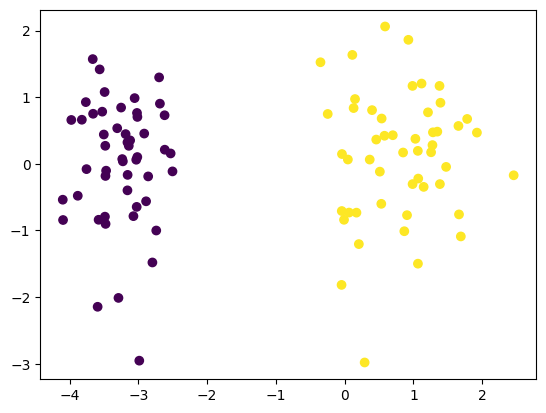

In [3]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,)

In [4]:
class LogisticRegressionGD:
    def __init__(self, lr=0.5, n_iter=5000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.ones(X.shape[1])
        
        for _ in range(self.n_iter):
            y_hat = self.sigmoid(np.dot(X, self.weights))
            self.weights += self.lr * (np.dot((y - y_hat), X) / X.shape[0])
        
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [7]:
model = LogisticRegressionGD(lr=0.5, n_iter=5000)

In [8]:
model.fit(X, y)

In [9]:
coef_=model.weights
intercept_=model.bias

In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [15]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input1 + b

(-3.0, 2.0)

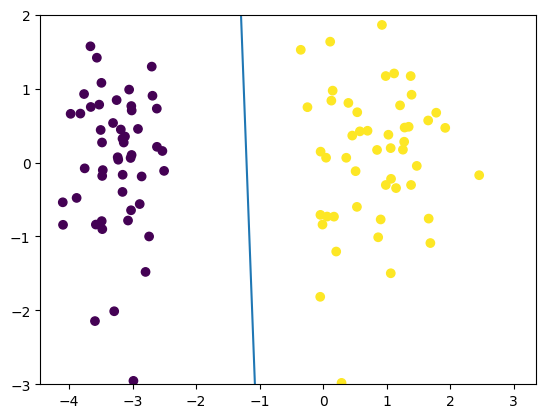

In [21]:
plt.figure()
plt.plot(x_input,y_input)
plt.scatter(X[:,0],X[:,1],c=y)
plt.ylim(-3,2)